# Pandas 심화

### 실습을 위한 데이터 불러오기

In [1]:
import os
print(os.getcwd())

c:\Users\USER\Desktop\새싹\SSESAC_DE\1117


In [2]:
# 실습을 위한 데이터 불러오기
import pandas as pd

df = pd.read_csv('data/seoul_park04.csv')
print(df) 

              날짜 공휴일     날씨    어른    청소년  어린이  외국인   단체  총입장객수     연  월   일 요일
0     2016-01-01   O  구름 조금  2799  141.0  419   47    0   4382  2016  1   1  금
1     2016-01-02   O  구름 많음  4370  203.0  600  100  111   7265  2016  1   2  토
2     2016-01-03   O  구름 많음  2571  128.0  309   91    0   4557  2016  1   3  일
3     2016-01-04   X  구름 많음   602  463.0  235   51  223   1690  2016  1   4  월
4     2016-01-05   X  구름 많음   319   35.0   62   43   47   1256  2016  1   5  화
...          ...  ..    ...   ...    ...  ...  ...  ...    ...   ... ..  .. ..
1081  2019-03-27   X  구름 많음   464   10.0   30   21    0   1117  2019  3  27  수
1082  2019-03-28   X  구름 많음   687   46.0   28   35  108   1665  2019  3  28  목
1083  2019-03-29   X  구름 조금  1447  120.0   77   14  188   2870  2019  3  29  금
1084  2019-03-30   O     흐림  1326   44.0  169   29  115   2452  2019  3  30  토
1085  2019-03-31   O  구름 조금  2563  111.0  387   53    0   4418  2019  3  31  일

[1086 rows x 13 columns]


## 1. 데이터 추출: 조건 기반

조건에 따라 데이터 추출: Boolean Indexing
- 비교/논리 연사자를 활용하여 조건이 참이 되는 데이터(행;row) 추출
    - ```df[조건식]```

In [3]:
# 데이터 프레임에서 어른 컬럼에 대해 각 행의 값이 1000 초과인 행만 추출
df[df['어른']>1000]

,날짜,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,요일
0,2016-01-01,O,구름 조금,2799,141.0,419,47,0,4382,2016,1,1,금
1,2016-01-02,O,구름 많음,4370,203.0,600,100,111,7265,2016,1,2,토
2,2016-01-03,O,구름 많음,2571,128.0,309,91,0,4557,2016,1,3,일
8,2016-01-09,O,구름 많음,1227,78.0,113,47,80,2640,2016,1,9,토
9,2016-01-10,O,구름 많음,1839,96.0,276,34,61,3604,2016,1,10,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,2019-03-23,O,눈/비,1760,44.0,293,42,0,3562,2019,3,23,토
1078,2019-03-24,O,맑음,8502,161.0,1376,74,35,12787,2019,3,24,일
1083,2019-03-29,X,구름 조금,1447,120.0,77,14,188,2870,2019,3,29,금
1084,2019-03-30,O,흐림,1326,44.0,169,29,115,2452,2019,3,30,토


pandas의 논리 연산자를 활용하면 복잡한 조건 추가 가능 - 일반python과의 차이가 있음
  
|논리 연산자|의미|설명|예시|
|---|---|---|---|
|&|And|두 조건이 모두 참일 때, 참|(A>30)&(A<50)|
|\||OR|둘 중 하나라도 참이면, 참|(A>30)|(A<50)|
|~|NOT|조건이 거짓인 경우, 참|~(A >10)|  

- !논리 연산자의 각 명제는 **소괄호**로 반드시 감싸줘야 한다!

In [4]:
'''
데이터 프레임에서

'어른' 컬럼의 값이 1000보다 크고,
'어린이' 컬럼의 값이 1000보다 큰

조건을 만족하는 행만 추출
'''
df[(df['어른'] > 1000)&(df['어린이']>1000)]

,날짜,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,요일
78,2016-03-19,O,구름 조금,22735,422.0,2990,112,178,33131,2016,3,19,토
79,2016-03-20,O,구름 조금,22947,535.0,3370,176,0,34360,2016,3,20,일
85,2016-03-26,O,맑음,14114,408.0,2094,192,62,21748,2016,3,26,토
86,2016-03-27,O,맑음,20041,487.0,2860,205,60,30489,2016,3,27,일
92,2016-04-02,O,구름 조금,26605,561.0,3643,169,201,37787,2016,4,2,토
...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2018-11-03,O,맑음,9817,231.0,1525,152,436,16626,2018,11,3,토
938,2018-11-04,O,구름 조금,10223,307.0,1595,79,195,15903,2018,11,4,일
1063,2019-03-09,O,463,11023,157.0,1422,52,74,17833,2019,3,9,토
1071,2019-03-17,O,463,10313,199.0,1657,51,30,15718,2019,3,17,일


In [5]:
'''
Example: 학생 성적 데이터

Q1. 영어 점수가 국어 점수보다 높은 학생
Q2. 학년이 2학년 이상이면서 영어 점수가 90점 이상인 학생
Q3. 국어가 80미만이거나 수학이 80미만인 학생
Q4. 이름에 "지"가 포함된 학생
'''
import pandas as pd
data = {
    '이름':['철수','영희','민수','지영','수현','지훈'],
    '학년':[1,1,2,2,3,3],
    '국어':[80,95,70,88,90,85],
    '영어':[85,90,75,95,92,80],
    '수학':[78,85,68,90,95,82]
}
df1 = pd.DataFrame(data)
print(df1)

   이름  학년  국어  영어  수학
0  철수   1  80  85  78
1  영희   1  95  90  85
2  민수   2  70  75  68
3  지영   2  88  95  90
4  수현   3  90  92  95
5  지훈   3  85  80  82


In [6]:
# Q1. 영어 점수가 국어 점수보다 높은 학생
df1[df1['영어']>df1['국어']]

,이름,학년,국어,영어,수학
0,철수,1,80,85,78
2,민수,2,70,75,68
3,지영,2,88,95,90
4,수현,3,90,92,95


In [7]:
# Q2. 학년이 2학년 이상이면서 영어 점수가 90점 이상인 학생
df1[(df1['학년']>=2)&(df1['영어']>=90)]

,이름,학년,국어,영어,수학
3,지영,2,88,95,90
4,수현,3,90,92,95


In [8]:
# Q3. 국어가 80미만이거나 수학이 80미만인 학생
df1[(df1['국어']<80)|(df1['수학']<80)]

,이름,학년,국어,영어,수학
0,철수,1,80,85,78
2,민수,2,70,75,68


In [9]:
# Q4. 이름에 "지"가 포함된 학생
df1[df1['이름'].str.contains('지')]

,이름,학년,국어,영어,수학
3,지영,2,88,95,90
5,지훈,3,85,80,82


In [10]:
'''
Example2: 상품 매출 데이터

Q1. 매출이 600 이상인 거래
Q2. 2월에 이루어진 판매만 보기
Q3. 부산 지점이 아닌 거래만 보기
Q4. 매출이 평균 매출보다 높은 거래
Q5. 매출이 600 이상이고, 수량이 6 이상인 거래
'''
import pandas as pd

data = {
    '지점':['서울','서울','부산','부산','대구','대구'],
    '제품':['TV','냉장고','TV','세탁기','TV','냉장고'],
    '매출':[500,800,600,400,550,750],
    '수량':[5,8,6,4,5,7],
    '월':[1,1,2,2,3,3]
}
df2 = pd.DataFrame(data)
print(df2)

   지점   제품   매출  수량  월
0  서울   TV  500   5  1
1  서울  냉장고  800   8  1
2  부산   TV  600   6  2
3  부산  세탁기  400   4  2
4  대구   TV  550   5  3
5  대구  냉장고  750   7  3


In [11]:
# 1. 매출이 600 이상인 거래
df2[df2['매출']>=600]

,지점,제품,매출,수량,월
1,서울,냉장고,800,8,1
2,부산,TV,600,6,2
5,대구,냉장고,750,7,3


In [12]:
# 2. 2월에 이루어진 판매만 보기
df2[df2['월'] == 2]

,지점,제품,매출,수량,월
2,부산,TV,600,6,2
3,부산,세탁기,400,4,2


In [13]:
# 3. 부산 지점이 아닌 거래만 보기
df2[df2['지점'] != '부산']

,지점,제품,매출,수량,월
0,서울,TV,500,5,1
1,서울,냉장고,800,8,1
4,대구,TV,550,5,3
5,대구,냉장고,750,7,3


In [14]:
# 4. 매출이 평균 매출보다 높은 거래
df2[df2['매출'] > df2['매출'].mean()]

,지점,제품,매출,수량,월
1,서울,냉장고,800,8,1
5,대구,냉장고,750,7,3


In [15]:
# 5. 매출이 600 이상이고, 수량이 6 이상인 거래
df2[(df2['매출'] >= 600) & (df2['수량'] >= 6)]

,지점,제품,매출,수량,월
1,서울,냉장고,800,8,1
2,부산,TV,600,6,2
5,대구,냉장고,750,7,3


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1086 non-null   object 
 1   공휴일     1086 non-null   object 
 2   날씨      1086 non-null   object 
 3   어른      1086 non-null   int64  
 4   청소년     1086 non-null   float64
 5   어린이     1086 non-null   int64  
 6   외국인     1086 non-null   int64  
 7   단체      1086 non-null   int64  
 8   총입장객수   1086 non-null   int64  
 9   연       1086 non-null   int64  
 10  월       1086 non-null   int64  
 11  일       1086 non-null   int64  
 12  요일      1086 non-null   object 
dtypes: float64(1), int64(8), object(4)
memory usage: 110.4+ KB


In [17]:
print(df)

              날짜 공휴일     날씨    어른    청소년  어린이  외국인   단체  총입장객수     연  월   일 요일
0     2016-01-01   O  구름 조금  2799  141.0  419   47    0   4382  2016  1   1  금
1     2016-01-02   O  구름 많음  4370  203.0  600  100  111   7265  2016  1   2  토
2     2016-01-03   O  구름 많음  2571  128.0  309   91    0   4557  2016  1   3  일
3     2016-01-04   X  구름 많음   602  463.0  235   51  223   1690  2016  1   4  월
4     2016-01-05   X  구름 많음   319   35.0   62   43   47   1256  2016  1   5  화
...          ...  ..    ...   ...    ...  ...  ...  ...    ...   ... ..  .. ..
1081  2019-03-27   X  구름 많음   464   10.0   30   21    0   1117  2019  3  27  수
1082  2019-03-28   X  구름 많음   687   46.0   28   35  108   1665  2019  3  28  목
1083  2019-03-29   X  구름 조금  1447  120.0   77   14  188   2870  2019  3  29  금
1084  2019-03-30   O     흐림  1326   44.0  169   29  115   2452  2019  3  30  토
1085  2019-03-31   O  구름 조금  2563  111.0  387   53    0   4418  2019  3  31  일

[1086 rows x 13 columns]


In [18]:
'''
놀이공원 데이터셋에 대한 미션
Q1. 어른이 1000 초과이고, 공휴일인 데이터
Q2. 어른이 1000 초과이거나, 어린이가 2000초과인 데이터를 조회
Q3. 5월 5일(어린이날) 조회
'''
# 1. 어른이 1000 초과이고, 공휴일인 데이터
df[(df['어른'] > 1000) & (df['공휴일']=='O')]

,날짜,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,요일
0,2016-01-01,O,구름 조금,2799,141.0,419,47,0,4382,2016,1,1,금
1,2016-01-02,O,구름 많음,4370,203.0,600,100,111,7265,2016,1,2,토
2,2016-01-03,O,구름 많음,2571,128.0,309,91,0,4557,2016,1,3,일
8,2016-01-09,O,구름 많음,1227,78.0,113,47,80,2640,2016,1,9,토
9,2016-01-10,O,구름 많음,1839,96.0,276,34,61,3604,2016,1,10,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,2019-03-17,O,463,10313,199.0,1657,51,30,15718,2019,3,17,일
1077,2019-03-23,O,눈/비,1760,44.0,293,42,0,3562,2019,3,23,토
1078,2019-03-24,O,맑음,8502,161.0,1376,74,35,12787,2019,3,24,일
1084,2019-03-30,O,흐림,1326,44.0,169,29,115,2452,2019,3,30,토


In [19]:
# 2. 어른이 1000 초과이거나, 어린이가 2000초과인 데이터를 조회
df[(df['어른']>1000) | (df['어린이']>2000)]

,날짜,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,요일
0,2016-01-01,O,구름 조금,2799,141.0,419,47,0,4382,2016,1,1,금
1,2016-01-02,O,구름 많음,4370,203.0,600,100,111,7265,2016,1,2,토
2,2016-01-03,O,구름 많음,2571,128.0,309,91,0,4557,2016,1,3,일
8,2016-01-09,O,구름 많음,1227,78.0,113,47,80,2640,2016,1,9,토
9,2016-01-10,O,구름 많음,1839,96.0,276,34,61,3604,2016,1,10,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,2019-03-23,O,눈/비,1760,44.0,293,42,0,3562,2019,3,23,토
1078,2019-03-24,O,맑음,8502,161.0,1376,74,35,12787,2019,3,24,일
1083,2019-03-29,X,구름 조금,1447,120.0,77,14,188,2870,2019,3,29,금
1084,2019-03-30,O,흐림,1326,44.0,169,29,115,2452,2019,3,30,토


In [20]:
# 5월 5일(어린이날) 조회
df[df['날짜'].str.contains("05-05")]

,날짜,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,요일
125,2016-05-05,O,463,38511,1708.0,0,476,35,58688,2016,5,5,목
390,2017-05-05,O,구름 조금,25824,1222.0,0,616,170,46264,2017,5,5,금
755,2018-05-05,O,맑음,28592,899.0,30,208,65,52310,2018,5,5,토


## 2. 데이터 추출 : 라벨 기반

### 라벨로 데이터 추출
- 라벨은 곧 이름을 의미하며, 각각 행의 이름, 열의 이름으로 데이터를 선택하는 것
    - ```df.loc[행 라벨, 열 라벨]```

In [21]:
print(df1)

   이름  학년  국어  영어  수학
0  철수   1  80  85  78
1  영희   1  95  90  85
2  민수   2  70  75  68
3  지영   2  88  95  90
4  수현   3  90  92  95
5  지훈   3  85  80  82


In [22]:
df3 = df1.set_index('이름')
print(df3)

    학년  국어  영어  수학
이름                
철수   1  80  85  78
영희   1  95  90  85
민수   2  70  75  68
지영   2  88  95  90
수현   3  90  92  95
지훈   3  85  80  82


In [23]:
'''
라벨로 데이터 추출 (1) : 행만 선택
'''
# 시리즈타입으로 index가 2(민수)인 행 추출
df3.loc['민수']

학년     2
국어    70
영어    75
수학    68
Name: 민수, dtype: int64

In [24]:
# 데이터프레임에서 index가 민수와 지훈인 행 추출
df3.loc[['민수', '지훈']]

,학년,국어,영어,수학
이름,,,,
민수,2,70,75,68
지훈,3,85,80,82


In [25]:
df3.loc['영희':'수현']

,학년,국어,영어,수학
이름,,,,
영희,1,95,90,85
민수,2,70,75,68
지영,2,88,95,90
수현,3,90,92,95


In [26]:
'''
라벨로 데이터 추출(2) : 행과 열 선택
'''
# index가 민수이고, 컬럼 '국어'인 원소 추출
print(df3.loc['민수', '국어'])

70


In [27]:
# index가 '민수'와 '수현'이고, 컬럼이 '국어'와 '영어'인 데이터 추출
df3.loc[['민수','수현'],['국어','영어']]

,국어,영어
이름,,
민수,70,75
수현,90,92


In [28]:
df3.loc[:'민수', '국어':'수학']

,국어,영어,수학
이름,,,
철수,80,85,78
영희,95,90,85
민수,70,75,68


### 라벨로 데이터 추출 (3): Boolean Indexing 활용

- 행 라벨 부분에 조건식을 넣으면, 조건을 만족하는 행을 추출한 뒤, 
- 열 라벨에 넣은 컬럼만 추출하는 것
    - ```df.loc[조건식, 열 라벨]```

In [29]:
import pandas as pd

data = pd.read_csv('data/seoul_park04.csv')

df = pd.DataFrame(data)

In [30]:
# 어른이 1000 초과 행과 어린이가 1000 초과인 행
df.loc[(df['어른']> 1000) & (df['어린이']>1000)]

,날짜,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,요일
78,2016-03-19,O,구름 조금,22735,422.0,2990,112,178,33131,2016,3,19,토
79,2016-03-20,O,구름 조금,22947,535.0,3370,176,0,34360,2016,3,20,일
85,2016-03-26,O,맑음,14114,408.0,2094,192,62,21748,2016,3,26,토
86,2016-03-27,O,맑음,20041,487.0,2860,205,60,30489,2016,3,27,일
92,2016-04-02,O,구름 조금,26605,561.0,3643,169,201,37787,2016,4,2,토
...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2018-11-03,O,맑음,9817,231.0,1525,152,436,16626,2018,11,3,토
938,2018-11-04,O,구름 조금,10223,307.0,1595,79,195,15903,2018,11,4,일
1063,2019-03-09,O,463,11023,157.0,1422,52,74,17833,2019,3,9,토
1071,2019-03-17,O,463,10313,199.0,1657,51,30,15718,2019,3,17,일


In [31]:
# 어른이 1000초과한 '연','월','일','어른' columns
df.loc[df['어른']> 1000, ['연','월','일','어른']]

,연,월,일,어른
0,2016,1,1,2799
1,2016,1,2,4370
2,2016,1,3,2571
8,2016,1,9,1227
9,2016,1,10,1839
...,...,...,...,...
1077,2019,3,23,1760
1078,2019,3,24,8502
1083,2019,3,29,1447
1084,2019,3,30,1326


In [32]:
# 인덱스가 3부터 6이고, 컬럼이 어른부터 외국인 조회
df.loc[3:6, '어른':'외국인']

,어른,청소년,어린이,외국인
3,602,463.0,235,51
4,319,35.0,62,43
5,277,41.0,49,34
6,250,23.0,36,13


## 3. 데이터 추출 : 순서 기반

In [33]:
data = [
    [95,88,96],
    [72,72,68],
    [83,93,85],
    [89,80,94],
    [100,95,93]
]

df = pd.DataFrame(data, index=['민수','도윤','서아','연우','하준'], columns=['국어','수학','영어'])
print(df)

     국어  수학  영어
민수   95  88  96
도윤   72  72  68
서아   83  93  85
연우   89  80  94
하준  100  95  93


- 순서(위치) 기반!
    - ```df.iloc[행 위치, 열 위치]```

### 순서로 데이터 추출(1) : 단일 원소 접근

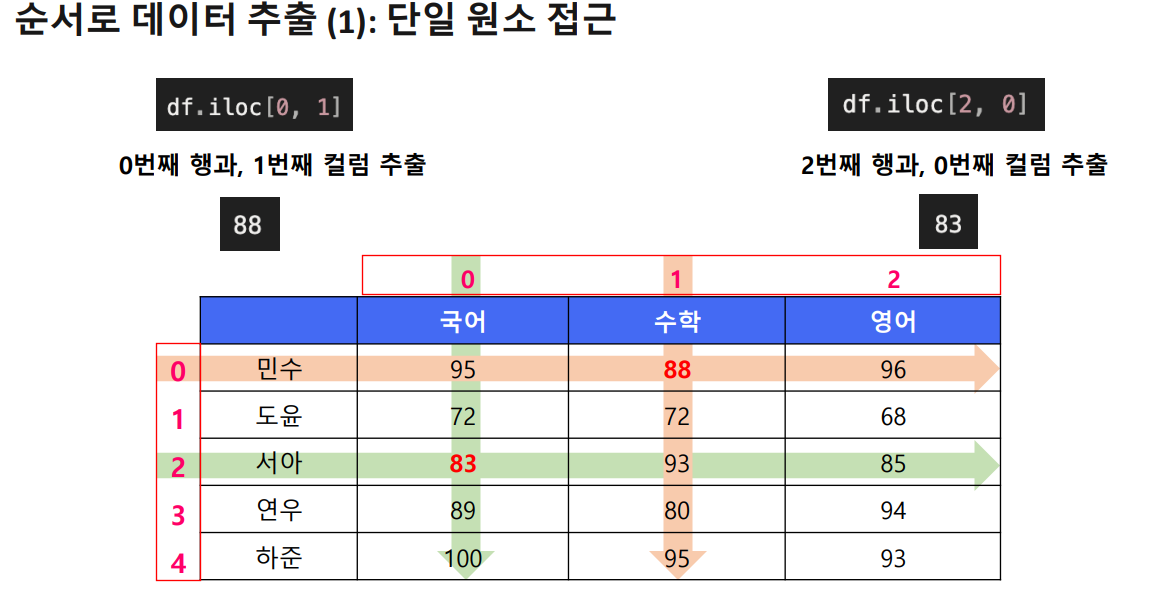

In [34]:
df.iloc[0,1]
print(df.iloc[0,1])

88


In [35]:
df.iloc[2,0]
print(df.iloc[2,0])

83


### 순서로 데이터 추출(2) : 행과 열 선택

끝자리는 포함 x
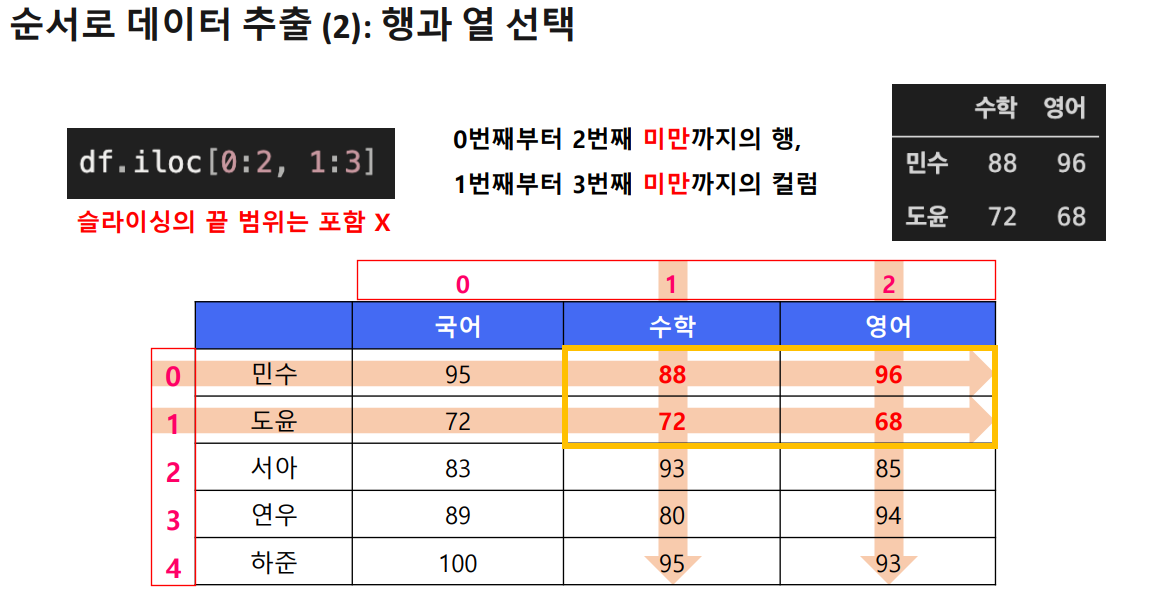

In [36]:
df.iloc[0:2, 1:3]

,수학,영어
민수,88,96
도윤,72,68


### 순서로 데이터 추출(3) : 행과 열 선택; 여러 케이스

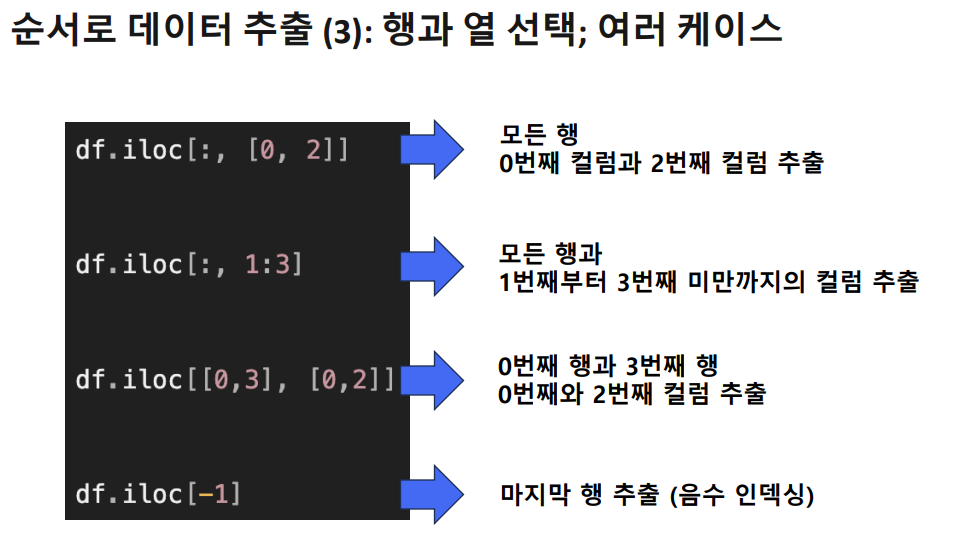

In [37]:
# 모든 행
# 0번째 컬럼과 2번째 컬럼 추출
df.iloc[:,[0,2]]

,국어,영어
민수,95,96
도윤,72,68
서아,83,85
연우,89,94
하준,100,93


In [38]:
# 모든 행과
# 1번째부터 3번째 미만까지의 컬럼 추출
df.iloc[:, 1:3]

,수학,영어
민수,88,96
도윤,72,68
서아,93,85
연우,80,94
하준,95,93


In [39]:
# 0번째 행과 3번째 행
# 0번째 컬럼과 2번째 컬럼 추출
df.iloc[[0,3],[0,2]]

,국어,영어
민수,95,96
연우,89,94


In [40]:
# 마지막 행 추출(음수 인덱싱)
df.iloc[-1]

국어    100
수학     95
영어     93
Name: 하준, dtype: int64

loc vs iloc  
- loc는 이름 활용
- iloc는 순서를 활용하여 위치 조회

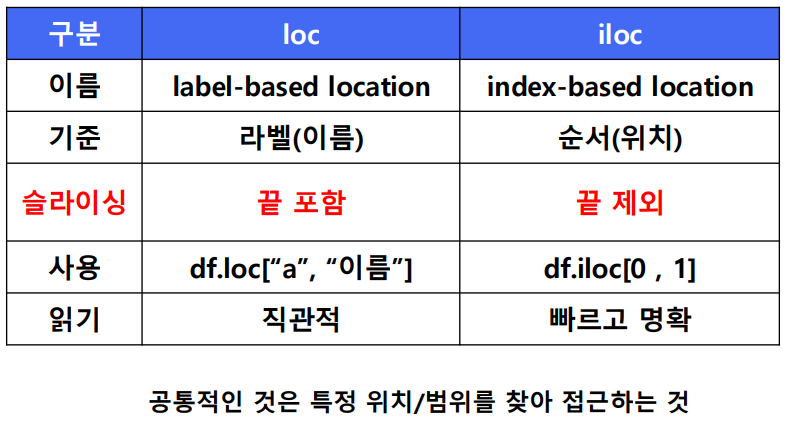

In [41]:
df.loc['도윤','영어']

np.int64(68)

In [42]:
df.iloc[1,2]

np.int64(68)

### 조회한 위치에 대한 값 변환 : 단일 원소 변경

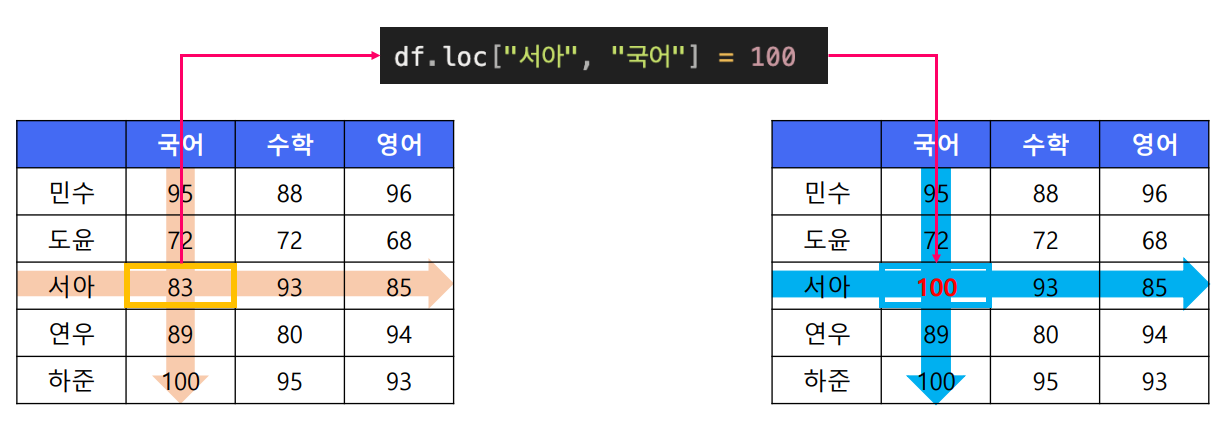

In [43]:
df.loc['서아','국어'] = 100
print(df)

     국어  수학  영어
민수   95  88  96
도윤   72  72  68
서아  100  93  85
연우   89  80  94
하준  100  95  93


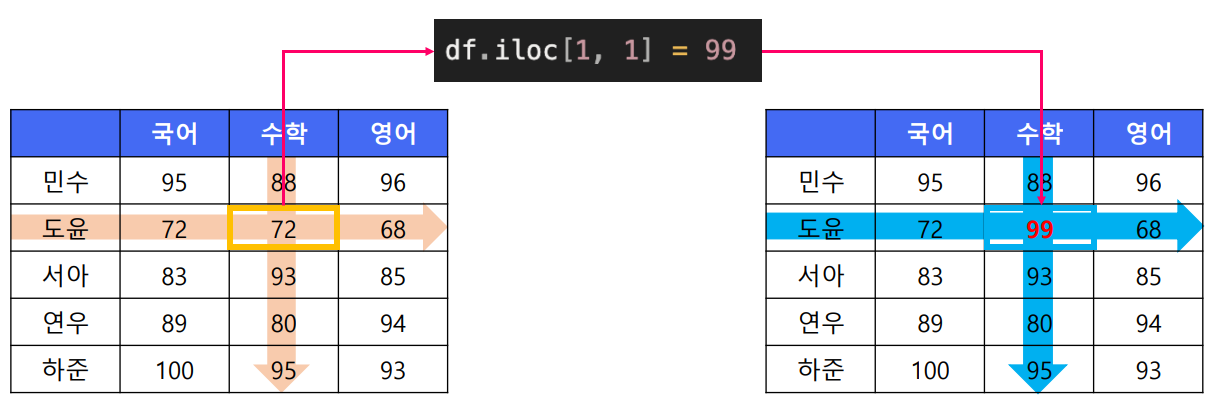

In [44]:
df.iloc[1,1] = 99
print(df)

     국어  수학  영어
민수   95  88  96
도윤   72  99  68
서아  100  93  85
연우   89  80  94
하준  100  95  93


### 조회한 위치에 대한 값 변환 : 여러 행/열 변경

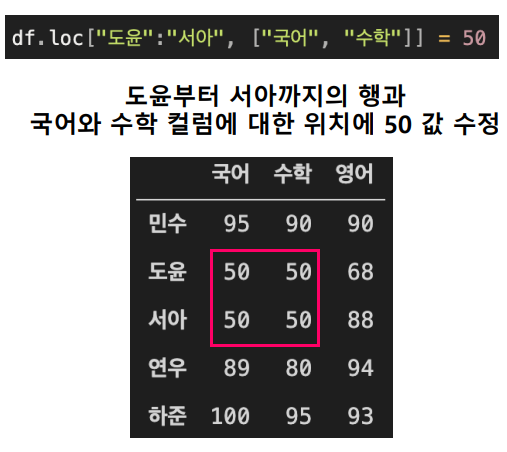

In [45]:
df.loc['도윤':'서아', ['국어','수학']] = 50
print(df)

     국어  수학  영어
민수   95  88  96
도윤   50  50  68
서아   50  50  85
연우   89  80  94
하준  100  95  93


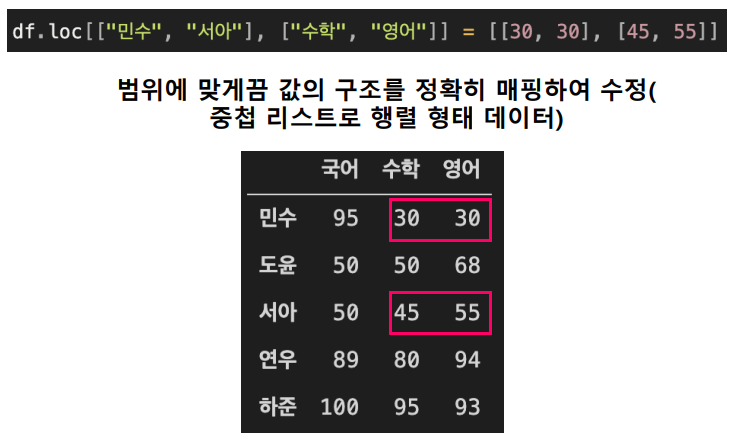

In [46]:
df.loc[['민수','서아'],['수학','영어']] = [[30,30],[45,55]]
print(df)

     국어  수학  영어
민수   95  30  30
도윤   50  50  68
서아   50  45  55
연우   89  80  94
하준  100  95  93


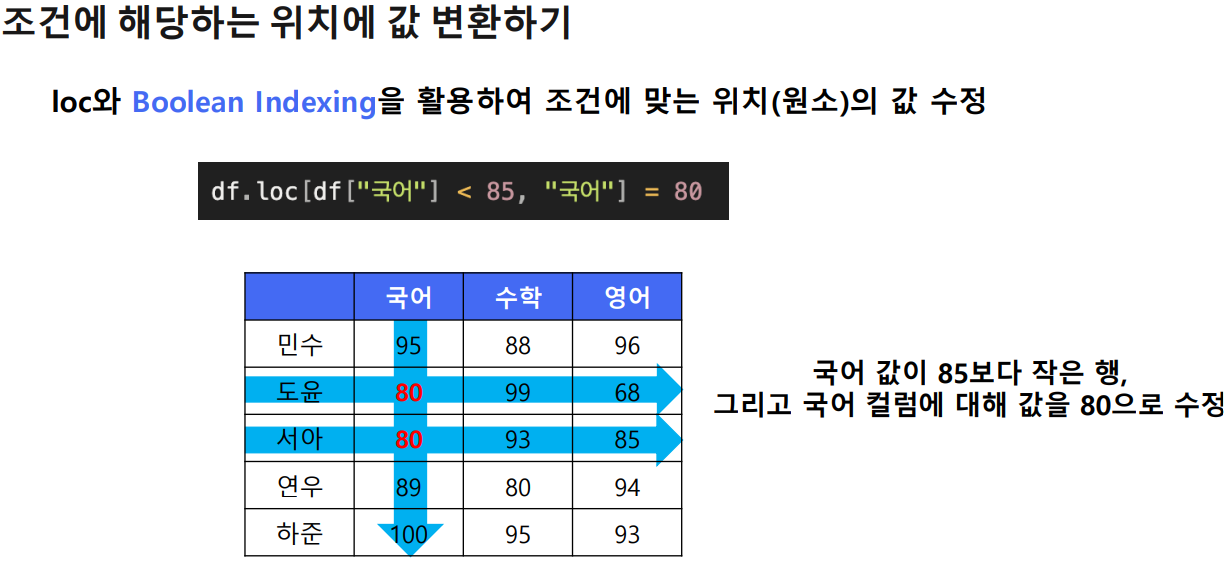

In [47]:
# 국어 값이 85보다 작은 행, 그리고 국어 컬럼에 대해 값을 80으로 수정
df.loc[df['국어'] < 85, '국어'] = 80
print(df)

     국어  수학  영어
민수   95  30  30
도윤   80  50  68
서아   80  45  55
연우   89  80  94
하준  100  95  93


In [48]:
'''
Exercise : 데이터 추출

왼쪽 데이터프레임을 생성하고, 아래 지시 사항을 수행
    Q1. 출석률이 0.9 미만인 학생의 영어 점수 출력
    Q2. 2~4번째 행, 1~3번째 열 데이터 출력
    Q3. 상위 3명의 국어, 수학 점수를 100점으로 변경
    Q4. 마지막 학생의 모든 점수를 10점 올리기
    Q5. 국어가 90이상이고, 수학이 90이상인 학생의 영어 점수를 95, 출석률을 1.0으로 변경
    Q6. 출석률이 0.8 미만인 학생의 영어 점수를 기조보다 0.9배로 조정
'''

data = {
    "이름": ["지민", "서준", "하늘", "민재", "예린", "도윤"],
    "국어": [88, 95, 76, 84, 92, 60],
    "수학": [90, 85, 70, 95, 98, 75],
    "영어": [82, 93, 65, 89, 91, 72],
    "출석률": [0.95, 0.90, 0.85, 1.00, 0.98, 0.70]
}

df = pd.DataFrame(data)

print(df)

   이름  국어  수학  영어   출석률
0  지민  88  90  82  0.95
1  서준  95  85  93  0.90
2  하늘  76  70  65  0.85
3  민재  84  95  89  1.00
4  예린  92  98  91  0.98
5  도윤  60  75  72  0.70


In [49]:
# Q1. 출석률이 0.9 미만인 학생의 영어 점수 출력
print(df.loc[df['출석률']<0.9, ['이름','영어']])

   이름  영어
2  하늘  65
5  도윤  72


In [50]:
# Q2. 2~4번째 행, 1~3번째 열 데이터 출력
print(df.iloc[2:5,0:3])

   이름  국어  수학
2  하늘  76  70
3  민재  84  95
4  예린  92  98


In [51]:
# Q3. 상위 3명의 국어, 수학 점수를 100점으로 변경
df.loc[0:2, ['국어','수학']] = 100
print(df)


   이름   국어   수학  영어   출석률
0  지민  100  100  82  0.95
1  서준  100  100  93  0.90
2  하늘  100  100  65  0.85
3  민재   84   95  89  1.00
4  예린   92   98  91  0.98
5  도윤   60   75  72  0.70


In [52]:
# Q4. 마지막 학생의 모든 점수를 10점 올리기
df.loc[5,['국어','수학','영어']] += 5
print(df)

   이름   국어   수학  영어   출석률
0  지민  100  100  82  0.95
1  서준  100  100  93  0.90
2  하늘  100  100  65  0.85
3  민재   84   95  89  1.00
4  예린   92   98  91  0.98
5  도윤   65   80  77  0.70


In [53]:
# Q5. 국어가 90점 이상이고, 수학이 90이상인 학생의 영어 점수를 95, 출석률을 1.0으로 변경
df.loc[(df['국어']>=90)&(df['수학']>=90), ['영어','출석률']] = [95,1.0]
print(df)

   이름   국어   수학  영어  출석률
0  지민  100  100  95  1.0
1  서준  100  100  95  1.0
2  하늘  100  100  95  1.0
3  민재   84   95  89  1.0
4  예린   92   98  95  1.0
5  도윤   65   80  77  0.7


In [54]:
# Q6. 출석률이 0.8 미만인 학생의 영어 점수를 기존보다 0.9배 조정
df.loc[df['출석률']<0.8, '영어'] *= 0.9
print(df)

   이름   국어   수학    영어  출석률
0  지민  100  100  95.0  1.0
1  서준  100  100  95.0  1.0
2  하늘  100  100  95.0  1.0
3  민재   84   95  89.0  1.0
4  예린   92   98  95.0  1.0
5  도윤   65   80  69.3  0.7


C:\Users\USER\AppData\Local\Temp\ipykernel_13548\1765765573.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[69.3]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['출석률']<0.8, '영어'] *= 0.9


## 데이터: Dirty Data

- 수집된 원천(Raw) 데이터는 불완전하거나 부정확한 경우가 많다.

|종류|의미|
|---|---|
|결측치(Missing Data)|비어있는 값, 누락된 값|
|오류 데이터(Wrong Data)|오류가 있는 데이터|
|사용불가 데이터(Inusable Data)|일관되지 않은 데이터|
|이상치(Outlier)|극단적으로 벗어난 값|

### 오류데이터(Wrong Data)

값이 틀린 데이터(사용자 실수로 인한)
- 오탈자
    - "age":255(원래는 25로 작성)
    - "name":"Sillion Valy" (원래는 Silicon Valley)
- 속성 값끼리 뒤바뀜
    - "age" , "height" :"180","25"
    - "major","hobby" : "tennis", "computer scienc"
    

### 사용불가 데이터(Unusable Data)

모호한 표현, 다중표현, 단위/포맷 불일치, 중복 데이터
||예시|해석|
|---|---|---|
|모호한 표현|광주|경기도 광주? 전라도 광주?|
|다중 포현|Microsoft vs. MS <br> KakaoTalk vs. 카톡|여러가지 표현|
|단위/포맷 불일치|010-1234-5678 vs. 01012345678 <br><br>2025.11.17(대한민국) vs. 11/17/2025(미국) vs. 17/11/2025(프랑스) <br><br> 1kg vs. 1pound|형식과 단위 통일 맞지 않음|

### 이상치(Outlier; anomaly data, noisy data)

- 값이 극단적으로 벗어난 값
    - 몸무게가 200kg인 사람
    - 키가 220cm인 사람
    - 데이터 사이언스과목에서 1000점 얻은 학생, 그리고 50점을 얻은 학생
- 다만, 이상치 자체가 심층 분석을 위한 타겟이 될 수도 있음
    - ex) 사기 탐지, 암세포 탐지 등등

## 데이터 정제하기

In [55]:
data = pd.read_csv('data/seoul_park04.csv')

df = pd.DataFrame(data)
print(df)

              날짜 공휴일     날씨    어른    청소년  어린이  외국인   단체  총입장객수     연  월   일 요일
0     2016-01-01   O  구름 조금  2799  141.0  419   47    0   4382  2016  1   1  금
1     2016-01-02   O  구름 많음  4370  203.0  600  100  111   7265  2016  1   2  토
2     2016-01-03   O  구름 많음  2571  128.0  309   91    0   4557  2016  1   3  일
3     2016-01-04   X  구름 많음   602  463.0  235   51  223   1690  2016  1   4  월
4     2016-01-05   X  구름 많음   319   35.0   62   43   47   1256  2016  1   5  화
...          ...  ..    ...   ...    ...  ...  ...  ...    ...   ... ..  .. ..
1081  2019-03-27   X  구름 많음   464   10.0   30   21    0   1117  2019  3  27  수
1082  2019-03-28   X  구름 많음   687   46.0   28   35  108   1665  2019  3  28  목
1083  2019-03-29   X  구름 조금  1447  120.0   77   14  188   2870  2019  3  29  금
1084  2019-03-30   O     흐림  1326   44.0  169   29  115   2452  2019  3  30  토
1085  2019-03-31   O  구름 조금  2563  111.0  387   53    0   4418  2019  3  31  일

[1086 rows x 13 columns]


### 데이터 정렬하기 : sort_values()

- 데이터 프레임의 특정 컬럼 값을 기준으로 전체 데이터를 정렬
    - ```df.sort_values('기준컬럼', ascending= <>)```
        - ascending이 True 면 오름차순(Default), False면 내림차순

In [56]:
df.sort_values('총입장객수')

,날짜,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,요일
352,2017-03-28,X,구름 많음,0,0.0,0,0,0,2,2017,3,28,화
353,2017-03-29,X,구름 조금,0,0.0,0,0,0,7,2017,3,29,수
654,2018-01-24,X,맑음,16,1.0,1,0,0,128,2018,1,24,수
655,2018-01-25,X,맑음,23,0.0,0,1,0,162,2018,1,25,목
656,2018-01-26,X,맑음,31,13.0,6,0,0,222,2018,1,26,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2017-04-08,O,구름 조금,24756,638.0,3120,220,137,40887,2017,4,8,토
156,2016-06-05,O,구름 조금,28943,1079.0,3482,729,190,41743,2016,6,5,일
390,2017-05-05,O,구름 조금,25824,1222.0,0,616,170,46264,2017,5,5,금
755,2018-05-05,O,맑음,28592,899.0,30,208,65,52310,2018,5,5,토


In [57]:
df.sort_values('총입장객수', ascending=False)

,날짜,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,요일
125,2016-05-05,O,463,38511,1708.0,0,476,35,58688,2016,5,5,목
755,2018-05-05,O,맑음,28592,899.0,30,208,65,52310,2018,5,5,토
390,2017-05-05,O,구름 조금,25824,1222.0,0,616,170,46264,2017,5,5,금
156,2016-06-05,O,구름 조금,28943,1079.0,3482,729,190,41743,2016,6,5,일
363,2017-04-08,O,구름 조금,24756,638.0,3120,220,137,40887,2017,4,8,토
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,2018-01-26,X,맑음,31,13.0,6,0,0,222,2018,1,26,금
655,2018-01-25,X,맑음,23,0.0,0,1,0,162,2018,1,25,목
654,2018-01-24,X,맑음,16,1.0,1,0,0,128,2018,1,24,수
353,2017-03-29,X,구름 조금,0,0.0,0,0,0,7,2017,3,29,수


### 인덱스 재정하기: reset_index()

데이터프레임의 인덱스를 처음부터 다시 지정해줄 때 사용
- 데이터를 정렬하거나, 삭제하거나, 추출하게 되면 인덱스가 뒤섞임
    - ```df.reset_index(drop = )```
    - drop이 True면 기존 인덱스 컬럼 삭제

In [58]:
df_sorted = df.sort_values('총입장객수')
df_sorted.reset_index()

,index,날짜,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,요일
0,352,2017-03-28,X,구름 많음,0,0.0,0,0,0,2,2017,3,28,화
1,353,2017-03-29,X,구름 조금,0,0.0,0,0,0,7,2017,3,29,수
2,654,2018-01-24,X,맑음,16,1.0,1,0,0,128,2018,1,24,수
3,655,2018-01-25,X,맑음,23,0.0,0,1,0,162,2018,1,25,목
4,656,2018-01-26,X,맑음,31,13.0,6,0,0,222,2018,1,26,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,363,2017-04-08,O,구름 조금,24756,638.0,3120,220,137,40887,2017,4,8,토
1082,156,2016-06-05,O,구름 조금,28943,1079.0,3482,729,190,41743,2016,6,5,일
1083,390,2017-05-05,O,구름 조금,25824,1222.0,0,616,170,46264,2017,5,5,금
1084,755,2018-05-05,O,맑음,28592,899.0,30,208,65,52310,2018,5,5,토


In [59]:
df_sorted.reset_index(drop=True)

,날짜,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,요일
0,2017-03-28,X,구름 많음,0,0.0,0,0,0,2,2017,3,28,화
1,2017-03-29,X,구름 조금,0,0.0,0,0,0,7,2017,3,29,수
2,2018-01-24,X,맑음,16,1.0,1,0,0,128,2018,1,24,수
3,2018-01-25,X,맑음,23,0.0,0,1,0,162,2018,1,25,목
4,2018-01-26,X,맑음,31,13.0,6,0,0,222,2018,1,26,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,2017-04-08,O,구름 조금,24756,638.0,3120,220,137,40887,2017,4,8,토
1082,2016-06-05,O,구름 조금,28943,1079.0,3482,729,190,41743,2016,6,5,일
1083,2017-05-05,O,구름 조금,25824,1222.0,0,616,170,46264,2017,5,5,금
1084,2018-05-05,O,맑음,28592,899.0,30,208,65,52310,2018,5,5,토


### 데이터 삭제하기: drop()

- 데이터프레임에서 특정 행이나 열을 삭제
    - ```df.drop('행/열 이름', axis = 0 또는 1)```
    - axis가 0이면 행 삭제, 1이면 열 삭제

In [60]:
df_sorted = df_sorted.drop(['연','월','일'], axis = 1)
print(df_sorted)

             날짜 공휴일     날씨     어른     청소년   어린이  외국인   단체  총입장객수 요일
352  2017-03-28   X  구름 많음      0     0.0     0    0    0      2  화
353  2017-03-29   X  구름 조금      0     0.0     0    0    0      7  수
654  2018-01-24   X     맑음     16     1.0     1    0    0    128  수
655  2018-01-25   X     맑음     23     0.0     0    1    0    162  목
656  2018-01-26   X     맑음     31    13.0     6    0    0    222  금
..          ...  ..    ...    ...     ...   ...  ...  ...    ... ..
363  2017-04-08   O  구름 조금  24756   638.0  3120  220  137  40887  토
156  2016-06-05   O  구름 조금  28943  1079.0  3482  729  190  41743  일
390  2017-05-05   O  구름 조금  25824  1222.0     0  616  170  46264  금
755  2018-05-05   O     맑음  28592   899.0    30  208   65  52310  토
125  2016-05-05   O    463  38511  1708.0     0  476   35  58688  목

[1086 rows x 10 columns]


Boolean Indexing 조건에 따른 행 삭제하기
- ```df.drop(<조건식>.index, axis = 0)```
    - 데이터프레임의 index 소성, 인덱스의 시퀀스를 반환하는 역할
    - 조건을 만족하는 행에 대한 인덱스를 시퀀스를 반환 후, 데이터프레임에서 해당 인덱스에 맞는 행을 삭제

In [61]:
df_sorted = df_sorted.drop(df[df['요일'] == '화'].index) # 화요일 행 삭제
print(df_sorted)

             날짜 공휴일     날씨     어른     청소년   어린이  외국인   단체  총입장객수 요일
353  2017-03-29   X  구름 조금      0     0.0     0    0    0      7  수
654  2018-01-24   X     맑음     16     1.0     1    0    0    128  수
655  2018-01-25   X     맑음     23     0.0     0    1    0    162  목
656  2018-01-26   X     맑음     31    13.0     6    0    0    222  금
642  2018-01-12   X     맑음     45     5.0     2   15    0    228  금
..          ...  ..    ...    ...     ...   ...  ...  ...    ... ..
363  2017-04-08   O  구름 조금  24756   638.0  3120  220  137  40887  토
156  2016-06-05   O  구름 조금  28943  1079.0  3482  729  190  41743  일
390  2017-05-05   O  구름 조금  25824  1222.0     0  616  170  46264  금
755  2018-05-05   O     맑음  28592   899.0    30  208   65  52310  토
125  2016-05-05   O    463  38511  1708.0     0  476   35  58688  목

[931 rows x 10 columns]


### 컬럼 이름 변경하기 : rename()

특정 컬럼의 이름을 변경.
- 딕셔너리 형태로 전달
    - ```df.rename(columns = {'바꿀이름':'새이름'})```

In [62]:
df_sorted = df_sorted.rename(columns={'총입장객수':'총계'})
print(df_sorted)

             날짜 공휴일     날씨     어른     청소년   어린이  외국인   단체     총계 요일
353  2017-03-29   X  구름 조금      0     0.0     0    0    0      7  수
654  2018-01-24   X     맑음     16     1.0     1    0    0    128  수
655  2018-01-25   X     맑음     23     0.0     0    1    0    162  목
656  2018-01-26   X     맑음     31    13.0     6    0    0    222  금
642  2018-01-12   X     맑음     45     5.0     2   15    0    228  금
..          ...  ..    ...    ...     ...   ...  ...  ...    ... ..
363  2017-04-08   O  구름 조금  24756   638.0  3120  220  137  40887  토
156  2016-06-05   O  구름 조금  28943  1079.0  3482  729  190  41743  일
390  2017-05-05   O  구름 조금  25824  1222.0     0  616  170  46264  금
755  2018-05-05   O     맑음  28592   899.0    30  208   65  52310  토
125  2016-05-05   O    463  38511  1708.0     0  476   35  58688  목

[931 rows x 10 columns]


### [참고!] inplace 매개 변수
- 이전에 살펴본 대부분읜 메서드는 원본 데이터프레임에 적용 x, ==> 따라서 덮어쓰기 사용했지만,,  
  
- ***But!*** inplace 매개 변수는 메서드 호출시, 덮어쓰기 없이 바로 원본에 적용하게끔 하는 기능
    - 단 원본을 다루는 것이기에, 한번 바뀌면 원래 상태로 되돌리수 없으므로 주의해서 사용!


In [63]:
df_sorted.drop('요일', axis=1, inplace=True)
print(df_sorted)

             날짜 공휴일     날씨     어른     청소년   어린이  외국인   단체     총계
353  2017-03-29   X  구름 조금      0     0.0     0    0    0      7
654  2018-01-24   X     맑음     16     1.0     1    0    0    128
655  2018-01-25   X     맑음     23     0.0     0    1    0    162
656  2018-01-26   X     맑음     31    13.0     6    0    0    222
642  2018-01-12   X     맑음     45     5.0     2   15    0    228
..          ...  ..    ...    ...     ...   ...  ...  ...    ...
363  2017-04-08   O  구름 조금  24756   638.0  3120  220  137  40887
156  2016-06-05   O  구름 조금  28943  1079.0  3482  729  190  41743
390  2017-05-05   O  구름 조금  25824  1222.0     0  616  170  46264
755  2018-05-05   O     맑음  28592   899.0    30  208   65  52310
125  2016-05-05   O    463  38511  1708.0     0  476   35  58688

[931 rows x 9 columns]


## 결측치(Missing Data)처리하기

결측치란?
- 데이터에 값이 없는 것/누락된 것. 데이터 분석시 처리해야 하는 대상!
    - 결측치가 많으면 데이터셋을 사용할 수 없다.
    - 분석/모델에 사용되는 데이터 수가 적어지므로 통계적인 유의미성이 줄어듦
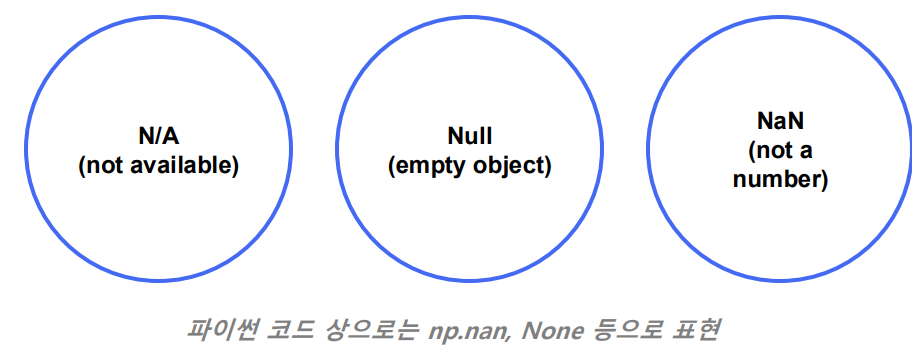

결측치 처리 전략 - 분석 방향에 따라 전략 수립
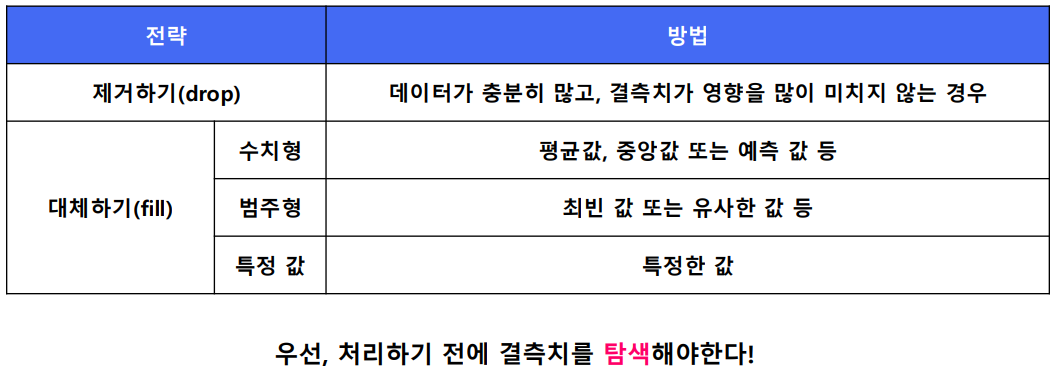

### 결측치 탐색하기: isna()

데이터 프레임의 각 원소가 결측치인지 여부를 **True/False**로 반환
- 보기 어려울 수 있기에, sum()과 함께 활용

In [115]:
data = pd.read_csv('C:/Users/USER/Desktop/새싹/SSESAC_DE/1114/data/seoul_park.csv')
df = pd.DataFrame(data)
print(df)

              날짜 공휴일     날씨   유료합계     어른  청소년  어린이  외국인   단체   무료합계     총계
0     2016-01-01   O  구름 조금  3,359  2,799  141  419   47    0  1,023  4,382
1     2016-01-02   O  구름 많음  5,173  4,370  203  600  100  111  2,092  7,265
2     2016-01-03   O  구름 많음  3,008  2,571  128  309   91    0  1,549  4,557
3     2016-01-04   X  구름 많음    890    602  NaN  235   51  223    800  1,690
4     2016-01-05   X  구름 많음    416    319   35   62   43   47    840  1,256
...          ...  ..    ...    ...    ...  ...  ...  ...  ...    ...    ...
1081  2019-03-27   X  구름 많음    504    464   10   30   21    -    613  1,117
1082  2019-03-28   X  구름 많음    761    687   46   28   35  108    904  1,665
1083  2019-03-29   X  구름 조금  1,644  1,447  120   77   14  188  1,226  2,870
1084  2019-03-30   O     흐림  1,539  1,326   44  169   29  115    913  2,452
1085  2019-03-31   O  구름 조금  3,061  2,563  111  387   53    -  1,357  4,418

[1086 rows x 11 columns]


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1086 non-null   object
 1   공휴일     1086 non-null   object
 2   날씨      946 non-null    object
 3   유료합계    1086 non-null   object
 4   어른      1086 non-null   object
 5   청소년     1081 non-null   object
 6   어린이     1086 non-null   object
 7   외국인     1086 non-null   object
 8   단체      1086 non-null   object
 9   무료합계    1086 non-null   object
 10  총계      1086 non-null   object
dtypes: object(11)
memory usage: 93.5+ KB


In [117]:
df.isna()

,날짜,공휴일,날씨,유료합계,어른,청소년,어린이,외국인,단체,무료합계,총계
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1081,False,False,False,False,False,False,False,False,False,False,False
1082,False,False,False,False,False,False,False,False,False,False,False
1083,False,False,False,False,False,False,False,False,False,False,False
1084,False,False,False,False,False,False,False,False,False,False,False


In [118]:
df.isna().sum()

날짜        0
공휴일       0
날씨      140
유료합계      0
어른        0
청소년       5
어린이       0
외국인       0
단체        0
무료합계      0
총계        0
dtype: int64

### 결측치 처리 전략 (1) : 채우기 fillna()

- 데이터 프레임 내 결측치(NA, NaN)를 다른 값으로 대체
    - ```df.fillna(대체값)```

In [119]:
df['청소년'] = (
    df['청소년']
        .str.replace(',', '', regex=False)
        .replace(['-', '…', '', ' '], None)
        .astype(float)
)

In [120]:
# df['청소년'] = df['청소년'].fillna(int(df['청소년'].mean()))
df['청소년'].fillna(int(df['청소년'].mean()), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_13548\1587483024.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['청소년'].fillna(int(df['청소년'].mean()), inplace=True)


In [121]:
df.isna().sum()

날짜        0
공휴일       0
날씨      140
유료합계      0
어른        0
청소년       0
어린이       0
외국인       0
단체        0
무료합계      0
총계        0
dtype: int64

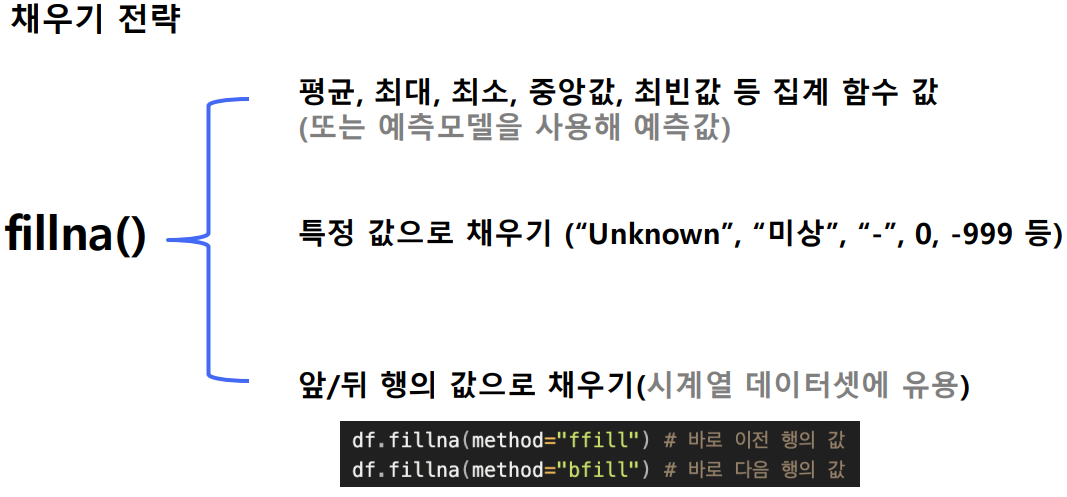

### 결측치 처리 전략 (2) : 삭제하기 dropna()

- 결측치가 포함된 행을 삭제
    - 단, 결측치가 적거나 해당 행/열이 분석에 큰 영향을 미치지 않을 때
- ```df.dropna(subset=['컬럼이름'], ignore_index = )```
    - subset : 특정 컬럼에 대해서 결측치가 포함된 해애을 삭제(생략 시 ,전체 컬럼을 대상)
    - ignore_index : True 전달 시, 결측치 포함 행 삭제 후, 인덱스 초기화

In [124]:
data = pd.read_csv('C:/Users/USER/Desktop/새싹/SSESAC_DE/1114/data/seoul_park.csv')
df = pd.DataFrame(data)
print(df)

              날짜 공휴일     날씨   유료합계     어른  청소년  어린이  외국인   단체   무료합계     총계
0     2016-01-01   O  구름 조금  3,359  2,799  141  419   47    0  1,023  4,382
1     2016-01-02   O  구름 많음  5,173  4,370  203  600  100  111  2,092  7,265
2     2016-01-03   O  구름 많음  3,008  2,571  128  309   91    0  1,549  4,557
3     2016-01-04   X  구름 많음    890    602  NaN  235   51  223    800  1,690
4     2016-01-05   X  구름 많음    416    319   35   62   43   47    840  1,256
...          ...  ..    ...    ...    ...  ...  ...  ...  ...    ...    ...
1081  2019-03-27   X  구름 많음    504    464   10   30   21    -    613  1,117
1082  2019-03-28   X  구름 많음    761    687   46   28   35  108    904  1,665
1083  2019-03-29   X  구름 조금  1,644  1,447  120   77   14  188  1,226  2,870
1084  2019-03-30   O     흐림  1,539  1,326   44  169   29  115    913  2,452
1085  2019-03-31   O  구름 조금  3,061  2,563  111  387   53    -  1,357  4,418

[1086 rows x 11 columns]


In [125]:
df.isna().sum()

날짜        0
공휴일       0
날씨      140
유료합계      0
어른        0
청소년       5
어린이       0
외국인       0
단체        0
무료합계      0
총계        0
dtype: int64

In [126]:
# 데이터 프레임에서 '청소년' 컬럼에서 결측치가 잇는 행을 삭제 후, 인덱스 초기화한 다음 덮어쓰기
df = df.dropna(subset=['청소년'], ignore_index = True)

In [127]:
df.isna().sum()

날짜        0
공휴일       0
날씨      139
유료합계      0
어른        0
청소년       0
어린이       0
외국인       0
단체        0
무료합계      0
총계        0
dtype: int64

In [130]:
df.shape

(1081, 11)

삭제 기준 매개 변수 : how
- how = 'any': 결측값이 하나라도 있으면 삭제 (Default)
- how = 'all' : 모든 값이 결측 값이면 삭제

In [133]:
data = [
    [1.0,4.0,7.0],
    [None, None, None],
    [3.0, None, None]
]

df = pd.DataFrame(data, columns=['A','B','C'])
print(df)

     A    B    C
0  1.0  4.0  7.0
1  NaN  NaN  NaN
2  3.0  NaN  NaN


In [134]:
df.dropna(how='all')

,A,B,C
0,1.0,4.0,7.0
2,3.0,NaN,NaN


삭제 기준 매개변수 : thresh
- 매개 변수에 숫자 전달
    - 남아 있어야 하는 비결측(non-NA)의 개수 기준
    - "이 행에 최소한 몇개의 유효한 값이 있어야 지우지 않을 것"을 의미

In [135]:
data = [
    [1.0,4.0,7.0,None],
    [None, None, None, 6.0],
    [3.0, None, None, 9.0],
    [None, 5.0,None,None]
]

df = pd.DataFrame(data, columns=['A','B','C','D'])
print(df)

     A    B    C    D
0  1.0  4.0  7.0  NaN
1  NaN  NaN  NaN  6.0
2  3.0  NaN  NaN  9.0
3  NaN  5.0  NaN  NaN


In [137]:
# 유효한 값이 2개 이상있으면 유지, 그렇지 않으면 삭제
df.dropna(thresh=2)

,A,B,C,D
0,1.0,4.0,7.0,NaN
2,3.0,NaN,NaN,9.0


삭제 기준으르 정의하는 옵션이기에 how와 thresh는 같이 사용 x

In [ ]:
# A나 B 컬럼 중 하나라도 결측값이면 행 삭제
df.dropna(how='any', subset=['A','B'])

In [ ]:
# A,B,C 컬럼 중 유효값(비결측치)이 2개 이상인 행만 남겨라
# (= 유효값이 2개 미만인 행은 삭제)
df.dropna(thresh=2, subset=['A','B','C'])

## 데이터 병합하기

### 데이터 병합하기 (1) : concat()

여러 데이터셋끼리 이어붙여서 (concatenate) 하나로 병합
- ```pd.concat([df1,df2], axis=,join=,ignore_index=)```

axis 매개변수 : 합치고자 하는 데이터프레임들을 어느 방향으로 합칠 것인가
- 0: 세로 방향(위아래)으로 합치기 (Defalut)
- 1: 가로방향(좌우)으로 합치기

join 매개변수 : 합칠 때 기준 설정
- "inner": 교집합으로 합치기; 각 데이터프레임의 공통된 컬럼끼리만
- "outer": 합집합으로 합치기 (Default); 모든 컬럼을 고려해서

ignore_index 매개변수 : 합치고 나서 인덱스를 유지할지, 새로 부여할지 결정
- True : 새로운 인덱스 부여
- False : 원본 데이터프레임의 인덱스를 유지(Default)

In [8]:
import pandas as pd

df1 = pd.read_csv("data/seoul_park04.csv")
df2 = pd.read_csv("data/seoul_park_april.csv")

In [9]:
print(df1.head())

           날짜 공휴일     날씨    어른    청소년  어린이  외국인   단체  총입장객수     연  월  일 요일
0  2016-01-01   O  구름 조금  2799  141.0  419   47    0   4382  2016  1  1  금
1  2016-01-02   O  구름 많음  4370  203.0  600  100  111   7265  2016  1  2  토
2  2016-01-03   O  구름 많음  2571  128.0  309   91    0   4557  2016  1  3  일
3  2016-01-04   X  구름 많음   602  463.0  235   51  223   1690  2016  1  4  월
4  2016-01-05   X  구름 많음   319   35.0   62   43   47   1256  2016  1  5  화


In [10]:
print(df2.head())

           날짜 요일 공휴일     날씨   유료합계     어른   청소년  어린이  외국인    단체   무료합계     총계
0  2019-04-01  월   X  구름 조금  1,064    953    12   72   42     0    812  1,818
1  2019-04-02  화   X  구름 조금  1,020    938     4   34   36    55  1,061  1,958
2  2019-04-03  수   X     맑음  2,749  2,313    57  337   31  1651  1,208  3,813
3  2019-04-04  목   X     맑음  1,630   1472    25   74   50   123  1,430   2755
4  2019-04-05  금   X     맑음  2,991   1507  1306   97   21  1368  1,109   3872


In [11]:
df_concat = pd.concat([df1,df2], axis =0 , join = "inner", ignore_index=True)
print(df_concat.head())

           날짜 공휴일     날씨    어른    청소년  어린이  외국인   단체 요일
0  2016-01-01   O  구름 조금  2799  141.0  419   47    0  금
1  2016-01-02   O  구름 많음  4370  203.0  600  100  111  토
2  2016-01-03   O  구름 많음  2571  128.0  309   91    0  일
3  2016-01-04   X  구름 많음   602  463.0  235   51  223  월
4  2016-01-05   X  구름 많음   319   35.0   62   43   47  화


In [12]:
print(df_concat.shape)
print(df_concat.columns)

(1116, 9)
Index(['날짜', '공휴일', '날씨', '어른', '청소년', '어린이', '외국인', '단체', '요일'], dtype='object')


### 데이터 병합하기 (2) : merge()

특정 컬럼을 기준으로 합치기
- ```pd.merge(df1, dfe2, on=, how=)```

on 매개변수
- 두 데이터프레임을 합칠 때, 어떤 컬럼을 기준으로 합칠 것인지에 대한 **기준이 되는 컬럼 이름**(병합 기준 컬럼)   
    = df1과 df2의 공통이 되는 컬럼

how 매개변수
- 두 데이터프레임의 각 행을 합칠 때의 방식(4가지)
    - "inner": 교집합(공통 컬럼의 각 행의 값이 같은 행만)
    - "outer": 합집합(각 데이터프레임의 모든 행 고려)
    - "left": df1에 있는 모든 데이터를 기준
    - "right": df2에 잇는 모든 데이터를 기준

In [14]:
df1 = pd.read_csv('data/seoul_park04.csv')
df2 = pd.read_csv('data/misemunji.csv')

In [21]:
print(df1.shape)
print(df1.head())

(1086, 13)
           날짜 공휴일     날씨    어른    청소년  어린이  외국인   단체  총입장객수     연  월  일 요일
0  2016-01-01   O  구름 조금  2799  141.0  419   47    0   4382  2016  1  1  금
1  2016-01-02   O  구름 많음  4370  203.0  600  100  111   7265  2016  1  2  토
2  2016-01-03   O  구름 많음  2571  128.0  309   91    0   4557  2016  1  3  일
3  2016-01-04   X  구름 많음   602  463.0  235   51  223   1690  2016  1  4  월
4  2016-01-05   X  구름 많음   319   35.0   62   43   47   1256  2016  1  5  화


In [22]:
print(df2.shape)
print(df2.head())

(1186, 7)
           날짜  미세먼지  초미세먼지     오존  이산화질소  일산화탄소  아황산가스
0  2016-01-01    68     45  0.006  0.047    1.0  0.006
1  2016-01-02    51     31  0.009  0.044    0.7  0.006
2  2016-01-03    96     58  0.013  0.049    0.9  0.007
3  2016-01-04    74     47  0.025  0.025    0.6  0.006
4  2016-01-05    32     16  0.016  0.025    0.4  0.006


In [19]:
'''
inner(교집합 데이터)
'''
inner_df = pd.merge(df1,df2, on='날짜', how ='inner')
print(inner_df.head())

           날짜 공휴일     날씨    어른    청소년  어린이  외국인   단체  총입장객수     연  월  일 요일  \
0  2016-01-01   O  구름 조금  2799  141.0  419   47    0   4382  2016  1  1  금   
1  2016-01-02   O  구름 많음  4370  203.0  600  100  111   7265  2016  1  2  토   
2  2016-01-03   O  구름 많음  2571  128.0  309   91    0   4557  2016  1  3  일   
3  2016-01-04   X  구름 많음   602  463.0  235   51  223   1690  2016  1  4  월   
4  2016-01-05   X  구름 많음   319   35.0   62   43   47   1256  2016  1  5  화   

   미세먼지  초미세먼지     오존  이산화질소  일산화탄소  아황산가스  
0    68     45  0.006  0.047    1.0  0.006  
1    51     31  0.009  0.044    0.7  0.006  
2    96     58  0.013  0.049    0.9  0.007  
3    74     47  0.025  0.025    0.6  0.006  
4    32     16  0.016  0.025    0.4  0.006  


In [20]:
print(inner_df.shape)
print(inner_df.columns)

(1086, 19)
Index(['날짜', '공휴일', '날씨', '어른', '청소년', '어린이', '외국인', '단체', '총입장객수', '연', '월',
       '일', '요일', '미세먼지', '초미세먼지', '오존', '이산화질소', '일산화탄소', '아황산가스'],
      dtype='object')


In [23]:
'''
outer(df1의 데이터 + 교집합 데이터 + df2의 데이터)
'''
outer_df = pd.merge(df1,df2, on='날짜', how = 'outer')
print(outer_df)

              날짜 공휴일     날씨      어른    청소년    어린이    외국인     단체   총입장객수  \
0     2016-01-01   O  구름 조금  2799.0  141.0  419.0   47.0    0.0  4382.0   
1     2016-01-02   O  구름 많음  4370.0  203.0  600.0  100.0  111.0  7265.0   
2     2016-01-03   O  구름 많음  2571.0  128.0  309.0   91.0    0.0  4557.0   
3     2016-01-04   X  구름 많음   602.0  463.0  235.0   51.0  223.0  1690.0   
4     2016-01-05   X  구름 많음   319.0   35.0   62.0   43.0   47.0  1256.0   
...          ...  ..    ...     ...    ...    ...    ...    ...     ...   
1181  2019-03-27   X  구름 많음   464.0   10.0   30.0   21.0    0.0  1117.0   
1182  2019-03-28   X  구름 많음   687.0   46.0   28.0   35.0  108.0  1665.0   
1183  2019-03-29   X  구름 조금  1447.0  120.0   77.0   14.0  188.0  2870.0   
1184  2019-03-30   O     흐림  1326.0   44.0  169.0   29.0  115.0  2452.0   
1185  2019-03-31   O  구름 조금  2563.0  111.0  387.0   53.0    0.0  4418.0   

           연    월     일 요일  미세먼지  초미세먼지     오존  이산화질소  일산화탄소  아황산가스  
0     2016.0  1.0   1.0  금   

In [24]:
print(outer_df.shape)
print(outer_df.columns)

(1186, 19)
Index(['날짜', '공휴일', '날씨', '어른', '청소년', '어린이', '외국인', '단체', '총입장객수', '연', '월',
       '일', '요일', '미세먼지', '초미세먼지', '오존', '이산화질소', '일산화탄소', '아황산가스'],
      dtype='object')


In [25]:
'''
left(df1의 데이터 + 교집합 데이터)
'''
left_df = pd.merge(df1, df2, on='날짜', how = 'left')
print(left_df)

              날짜 공휴일     날씨    어른    청소년  어린이  외국인   단체  총입장객수     연  월   일  \
0     2016-01-01   O  구름 조금  2799  141.0  419   47    0   4382  2016  1   1   
1     2016-01-02   O  구름 많음  4370  203.0  600  100  111   7265  2016  1   2   
2     2016-01-03   O  구름 많음  2571  128.0  309   91    0   4557  2016  1   3   
3     2016-01-04   X  구름 많음   602  463.0  235   51  223   1690  2016  1   4   
4     2016-01-05   X  구름 많음   319   35.0   62   43   47   1256  2016  1   5   
...          ...  ..    ...   ...    ...  ...  ...  ...    ...   ... ..  ..   
1081  2019-03-27   X  구름 많음   464   10.0   30   21    0   1117  2019  3  27   
1082  2019-03-28   X  구름 많음   687   46.0   28   35  108   1665  2019  3  28   
1083  2019-03-29   X  구름 조금  1447  120.0   77   14  188   2870  2019  3  29   
1084  2019-03-30   O     흐림  1326   44.0  169   29  115   2452  2019  3  30   
1085  2019-03-31   O  구름 조금  2563  111.0  387   53    0   4418  2019  3  31   

     요일  미세먼지  초미세먼지     오존  이산화질소  일산화탄소  아황산가스  


In [27]:
print(left_df.shape)

(1086, 19)


In [28]:
'''
right(df2의 데이터 + 교집합 데이터)
'''
right_df = pd.merge(df1, df2, on='날짜', how = 'right')
print(right_df)

              날짜 공휴일     날씨      어른    청소년    어린이    외국인     단체   총입장객수  \
0     2016-01-01   O  구름 조금  2799.0  141.0  419.0   47.0    0.0  4382.0   
1     2016-01-02   O  구름 많음  4370.0  203.0  600.0  100.0  111.0  7265.0   
2     2016-01-03   O  구름 많음  2571.0  128.0  309.0   91.0    0.0  4557.0   
3     2016-01-04   X  구름 많음   602.0  463.0  235.0   51.0  223.0  1690.0   
4     2016-01-05   X  구름 많음   319.0   35.0   62.0   43.0   47.0  1256.0   
...          ...  ..    ...     ...    ...    ...    ...    ...     ...   
1181  2019-03-27   X  구름 많음   464.0   10.0   30.0   21.0    0.0  1117.0   
1182  2019-03-28   X  구름 많음   687.0   46.0   28.0   35.0  108.0  1665.0   
1183  2019-03-29   X  구름 조금  1447.0  120.0   77.0   14.0  188.0  2870.0   
1184  2019-03-30   O     흐림  1326.0   44.0  169.0   29.0  115.0  2452.0   
1185  2019-03-31   O  구름 조금  2563.0  111.0  387.0   53.0    0.0  4418.0   

           연    월     일 요일  미세먼지  초미세먼지     오존  이산화질소  일산화탄소  아황산가스  
0     2016.0  1.0   1.0  금   

In [29]:
print(right_df.shape)

(1186, 19)


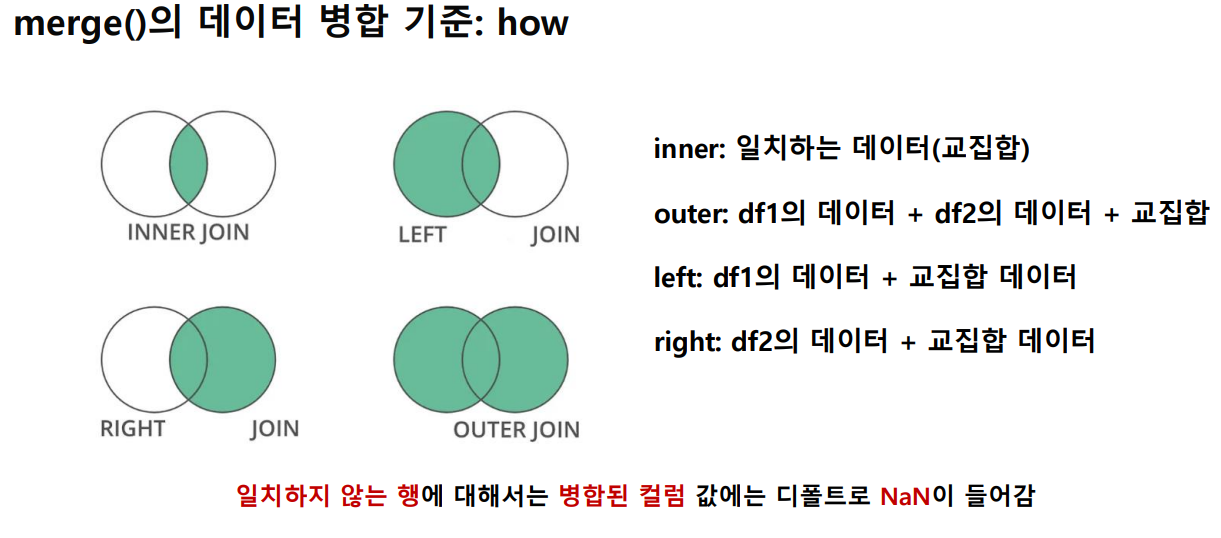

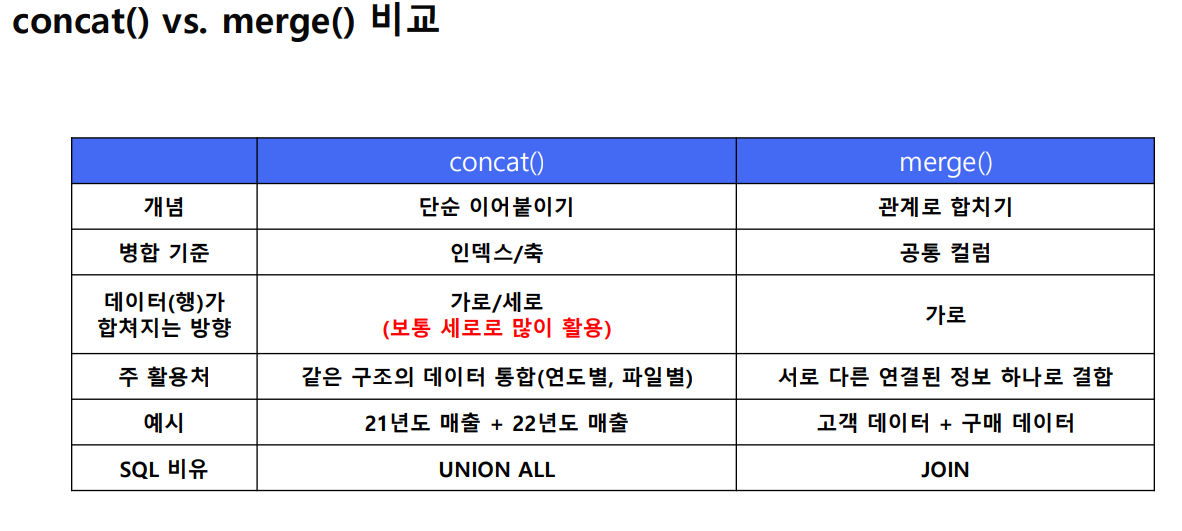